In [1]:
import matplotlib.pyplot as plt
import pandas as pd # to convert into a data frame
import numpy as np #To convert any column in n-array
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [3]:
s1=pd.read_csv("strokes.csv")

In [18]:
s1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
s2=s1.copy()

In [6]:
bmi_df=pd.DataFrame(s2['bmi'])

In [7]:
bmi_df_fil=bmi_df.fillna(bmi_df.mean())

In [8]:
dict1={'bmi':'bmi_m'}

In [9]:
bmi_df_fil.rename(columns=dict1, inplace=True)

In [10]:
s3=s2.drop('bmi', axis=1)

In [11]:
s4=s3.join(bmi_df_fil)

In [12]:
s4

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi_m
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1,36.600000
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1,28.893237
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1,32.500000
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1,34.400000
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1,24.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,never smoked,0,28.893237
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,never smoked,0,40.000000
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,never smoked,0,30.600000
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,formerly smoked,0,25.600000


In [14]:
s5=pd.get_dummies(s4,['gender','ever_married','work_type','Residence_type','smoking_status'])

In [15]:
s5

,id,age,hypertension,heart_disease,avg_glucose_level,stroke,bmi_m,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,1,36.600000,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,202.21,1,28.893237,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,1,32.500000,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,1,34.400000,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,1,24.000000,1,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,0,28.893237,1,0,0,...,0,1,0,0,0,1,0,0,1,0
5106,44873,81.0,0,0,125.20,0,40.000000,1,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,19723,35.0,0,0,82.99,0,30.600000,1,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,37544,51.0,0,0,166.29,0,25.600000,0,1,0,...,0,1,0,0,1,0,0,1,0,0


In [22]:
y=s5.stroke

In [23]:
x=s5.drop(['stroke', 'id'],axis=1)

In [24]:
x

,age,hypertension,heart_disease,avg_glucose_level,bmi_m,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
5106,81.0,0,0,125.20,40.000000,1,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.600000,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.600000,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0


In [25]:
kmeans=KMeans(n_clusters=3)
clusters=kmeans.fit_predict(x)

In [26]:
from scipy.stats import mode
labels=np.zeros_like(clusters)

Accuracy=  0.9512720156555773


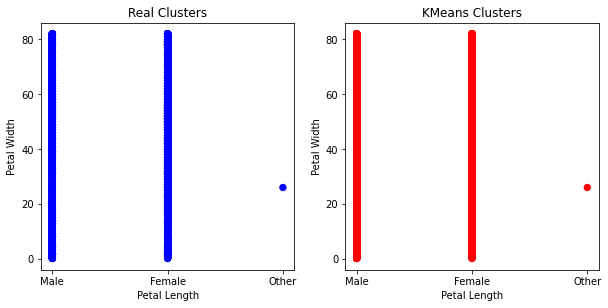

In [30]:
for i in range(3):
    cat=(clusters==i)
    labels[cat]=mode(y[cat])[0]

acc=accuracy_score(y,labels) 
print('Accuracy= ',acc)
plt.figure(figsize=(10,10))
colormap=np.array(['red','lime','blue'])
plt.subplot(2,2,1)
plt.scatter(s5.gender.x.age,c=colormap[y-1],s=40)
plt.title('Real Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.subplot(2,2,2)
plt.scatter(s5.gender,x.age,c=colormap[labels],s=40)
plt.title('KMeans Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()